In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
df = pd.read_excel('/content/output.xlsx')

In [3]:
df.head()

,failures,famrel,goout,health,absences,G3,Mental_Health_Index
0,0,4,4,3,4,11,0.664162
1,0,5,3,3,2,11,0.702186
2,0,4,2,3,6,12,0.411202
3,0,3,2,5,0,14,0.304763
4,0,4,2,5,0,13,0.430756


In [4]:
df['Mental_Health_Index'] = np.where(df['Mental_Health_Index'] < 0.5, 0, df['Mental_Health_Index'])
df['Mental_Health_Index'] = np.where(df['Mental_Health_Index'] == 0.5, 1, df['Mental_Health_Index'])
df['Mental_Health_Index'] = np.where(df['Mental_Health_Index'] > 0.5, 2, df['Mental_Health_Index'])

In [5]:
X = df.drop(['Mental_Health_Index'],axis=1)
y = df['Mental_Health_Index']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [7]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [8]:
type(X_train)

numpy.ndarray

In [9]:
type(y_train)

numpy.ndarray

In [10]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [11]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [12]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=6, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [24]:
import tqdm

epochs  = 1000
X_train = torch.Tensor(X_train)
#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()
y_train = torch.Tensor(y_train).long()
X_test  = torch.Tensor(X_test)
y_test  = torch.Tensor(y_test).long()

loss_list     = np.zeros((epochs,))
accuracy_list = np.zeros((epochs,))

for epoch in tqdm.trange(epochs):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 1000/1000 [00:01<00:00, 517.90it/s]


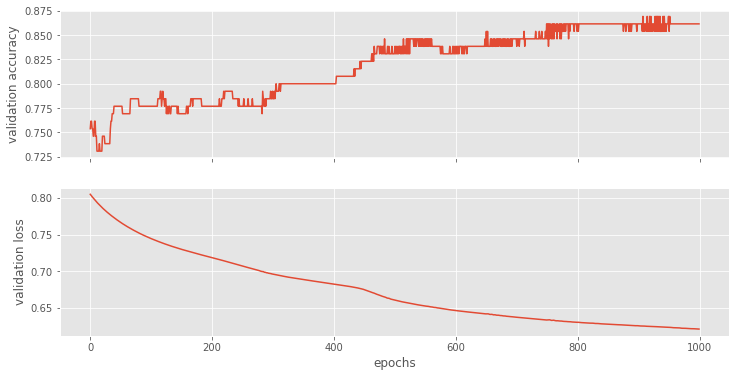

In [25]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");